### Importing Cleaning the Datasetand Intial EDA

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('cubic_zirconia.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [8]:
df['depth']

0        62.1
1        60.8
2        62.2
3        61.6
4        60.4
         ... 
26962    62.3
26963    61.9
26964    61.7
26965    61.8
26966    62.0
Name: depth, Length: 26967, dtype: float64

In [9]:
df['depth'].median()

61.8

In [10]:
df['depth'].mean()

61.74514655500572

In [11]:
#  outliers are not present in depth

In [12]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1b1dc6871d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b1dc544250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b1dc686290>],
 'medians': [<matplotlib.lines.Line2D at 0x1b1dc692050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b1dc692f10>],
 'means': []}

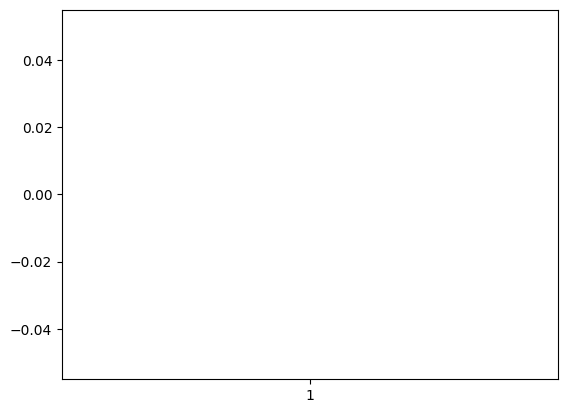

In [14]:
df['depth'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26967 entries, 0 to 26966
Series name: depth
Non-Null Count  Dtype  
--------------  -----  
26270 non-null  float64
dtypes: float64(1)
memory usage: 210.8 KB


In [15]:
import seaborn as sns

<Axes: >

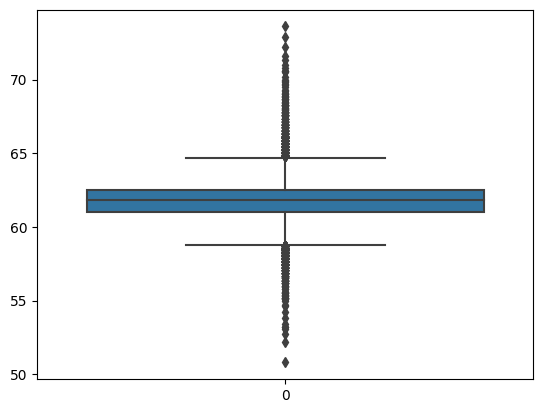

In [16]:
sns.boxplot(df['depth'])

In [17]:
df['depth'][df['depth'] > 66]

14       66.2
100      66.8
174      68.3
177      66.5
428      70.6
         ... 
25862    72.9
25883    72.2
26401    66.9
26573    70.8
26925    66.2
Name: depth, Length: 178, dtype: float64

### outliers are presnt in depth

In [18]:
df['depth'].fillna(df['depth'].median() ,inplace = True)
# Here imputating with median as outliers are present

In [19]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26967 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26967.0,61.746564,1.394509,50.8,61.10,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [22]:
df.shape

(26967, 11)

In [23]:
df.drop('Unnamed: 0',inplace = True,axis = 1)

In [24]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [25]:
df.loc[df['x'] == 0,'x'] = df['x'].median()
#  Finding cases where 

In [26]:
df.loc[df['y'] == 0,'y'] = df['y'].median()
df.loc[df['z'] == 0,'z'] = df['z'].median()

In [27]:
df.loc[df['z'] == 0,'z']

Series([], Name: z, dtype: float64)

In [28]:
df['z'].median()

3.52

In [29]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.746564,57.456080,5.730487,5.734204,3.539232,3939.518115
std,0.477745,1.394509,2.232068,1.126897,1.164488,0.717718,4024.864666
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### EDA 

## Carat

In [112]:
# Function  for analysing numerical values continous and discrete
def plot_hist_bar(attribute):
  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  sns.boxplot(df[attribute])
  plt.subplot(1,2,2)
  sns.histplot(df[attribute])

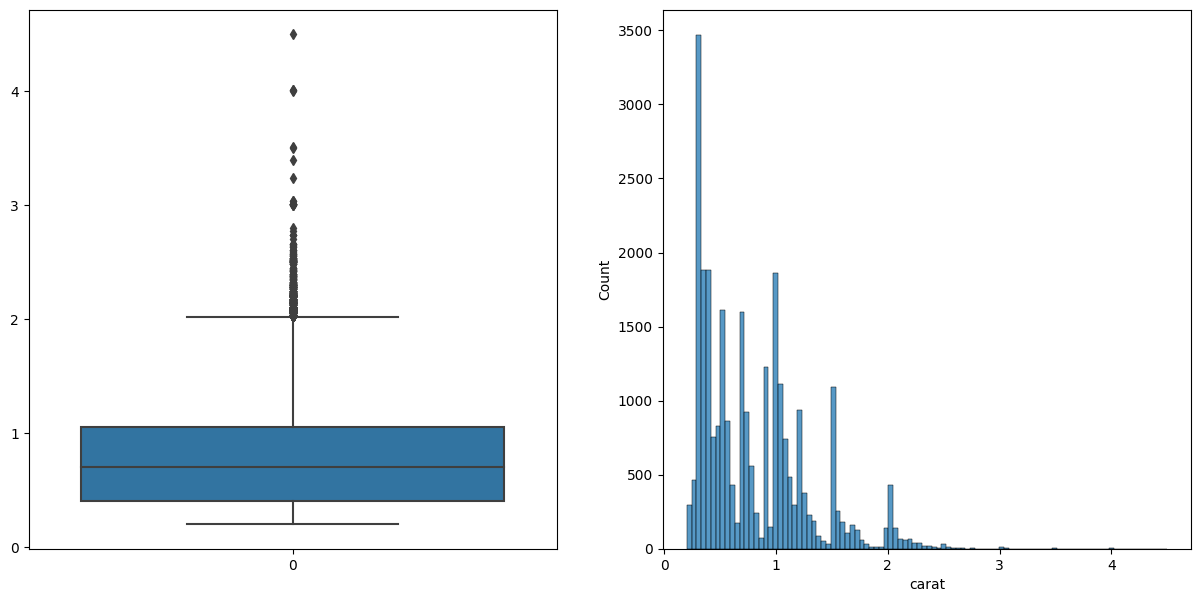

In [113]:
plot_hist_bar('carat')

### Carat Inferernce 1 
Data is highly skewed towards left side and steadly decreses in count as we move towards right side 

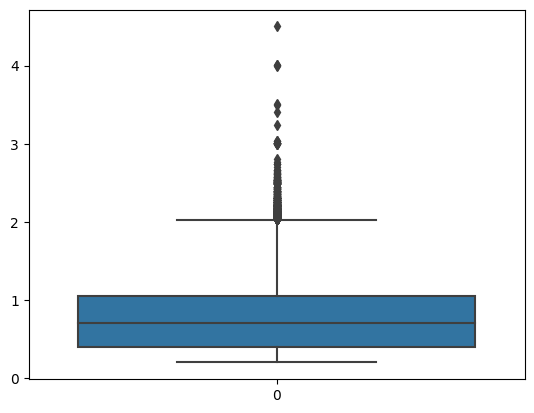

In [30]:
# Univariate analysis
import matplotlib.pyplot as plt
sns.boxplot(df['carat'])
plt.show()

In [31]:
df.loc[df['carat'] > 2,'carat']
# There are 975 outliers present in carat Nope further analyse

79       2.16
119      2.02
124      2.80
135      2.20
204      2.01
         ... 
26745    2.01
26845    2.23
26869    3.24
26924    2.03
26957    2.09
Name: carat, Length: 975, dtype: float64

In [32]:
Q1 = df['carat'].quantile(0.25)
Q1

0.4

In [33]:
Q3 = df['carat'].quantile(0.75)
Q3

1.05

In [34]:
IQR  = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

In [35]:
print(lower_range)
print(upper_range)

-0.5750000000000001
2.0250000000000004


In [36]:
df.loc[df['carat'] < lower_range,'carat']

Series([], Name: carat, dtype: float64)

In [37]:
df.loc[df['carat'] > upper_range,'carat']
# 662 are outliers


79       2.16
124      2.80
135      2.20
263      2.11
281      2.11
         ... 
26680    2.21
26845    2.23
26869    3.24
26924    2.03
26957    2.09
Name: carat, Length: 662, dtype: float64

In [38]:
662 / df['carat'].size * 100
# around 2 percent of the data are outliers

2.454852226795713

In [39]:

# Find out the percentage of outliers in the dataset per column
#  Create a function too automate it and then loop through the entire list of columns
# Decide whether to impute or have a ceiling in this case celing would be prefereed as the number 
# of data points are very less for eg 200 M data points then 5 % removing allowed  but incase of 400 
# data points even 5 % is too much
# Celing should be used 

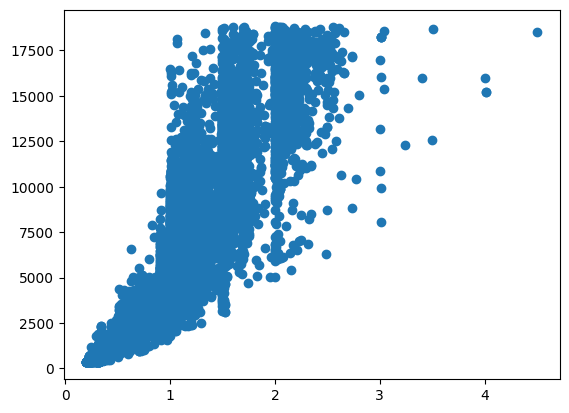

In [40]:
plt.scatter(df['carat'],df['price'])

In [41]:
# Ways to find the outliers boxplot IQR Scatter , Z-Score

In [42]:
from scipy import stats
import numpy as np

In [43]:
z  = np.abs(stats.zscore(df['carat']))
threshold = 3 
print(np.where(z >3))

(array([  124,   283,   409,   413,   459,   669,   770,   798,   951,
        1072,  1087,  1350,  1398,  1468,  1517,  1744,  1946,  2075,
        2078,  2210,  2384,  2466,  2784,  2907,  3025,  3082,  3194,
        3248,  3372,  3390,  3511,  3631,  3672,  3763,  3859,  4072,
        4135,  4184,  4649,  4696,  4743,  4884,  4900,  5045,  5323,
        5402,  5582,  5593,  5800,  6011,  6358,  6396,  6531,  6845,
        7033,  7364,  7529,  7878,  8000,  8087,  8156,  8165,  8205,
        8304,  8573,  8708,  8772,  9151,  9280,  9282,  9392,  9469,
        9625,  9637,  9674,  9751,  9899,  9968, 10208, 10422, 10434,
       10504, 10519, 10659, 10667, 10736, 10906, 11149, 11515, 11615,
       11943, 12112, 12411, 12500, 12555, 12631, 12758, 12810, 13052,
       13081, 13145, 13324, 13532, 13754, 13944, 13967, 14009, 14134,
       14142, 14320, 14417, 14444, 14456, 14462, 14677, 14967, 15080,
       15488, 15502, 15505, 15695, 15757, 16206, 16208, 16319, 16362,
       16425, 16538

In [44]:
upper_range

2.0250000000000004

In [45]:
#  Exploring different Quantiles at the upper End Since lower end does not have any outliers
print('90% quantile',df['carat'].quantile(0.90)) #1.51
print('95% quantile',df['carat'].quantile(0.95)) # 1.71
print('97.5% quantile',df['carat'].quantile(0.975)) # 2.02
print('99% quantile',df['carat'].quantile(0.99)) # 2.18 
print('99.9% quantile',df['carat'].quantile(0.999)) # 2.66

90% quantile 1.51
95% quantile 1.71
97.5% quantile 2.02
99% quantile 2.18
99.9% quantile 2.66


In [46]:
#  97.5 is the closest to the upper bound but I think we should use 99% so as some of the outliers are maintained as such this value will we used to winorize the dataset

# Creating  a copy 
df_win = df.copy(deep=True)
df_win.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [47]:
from scipy.stats.mstats import winsorize
# df_win['carat'] = winsorize(df_win['carat'],limits=[0,0.01]) !! Winorize only if needed
#  limit  here means lowest 0 value to be winosorized and the highest 99 to be winosorized

In [48]:
print(df['carat'].mean())
print(df_win['carat'].mean())


0.7983754218118442
0.7983754218118442


C:\Users\SAM\AppData\Local\Temp\ipykernel_15988\3806771758.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_win['carat'])


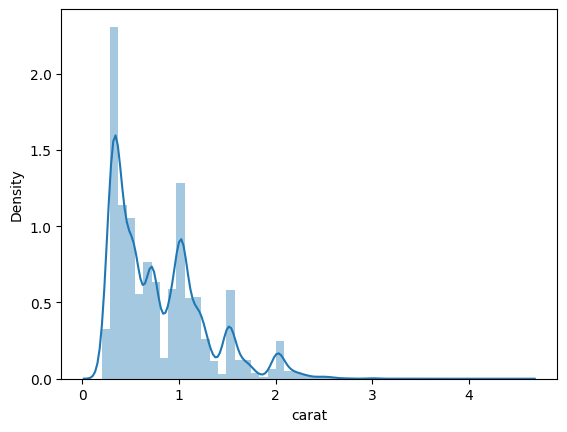

In [49]:
#  Now checking the outliers
sns.distplot(df_win['carat'])
plt.show()

C:\Users\SAM\AppData\Local\Temp\ipykernel_15988\3934730443.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carat'])


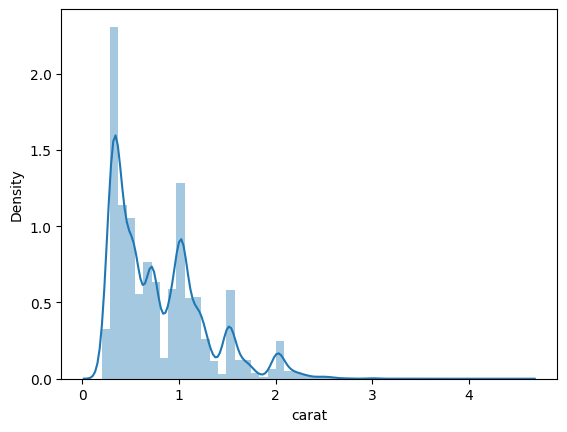

In [50]:
sns.distplot(df['carat'])
plt.show()

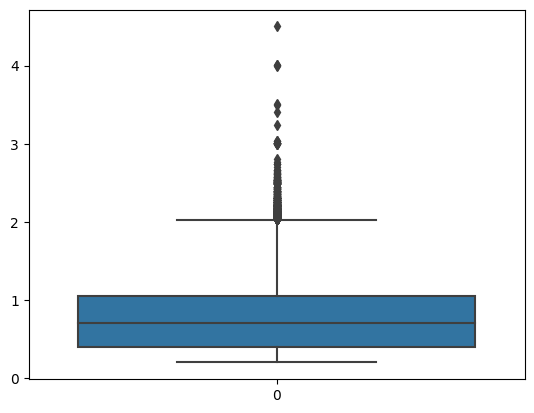

In [51]:
#  Now checking the outliers
sns.boxplot(df_win['carat'])
plt.show()

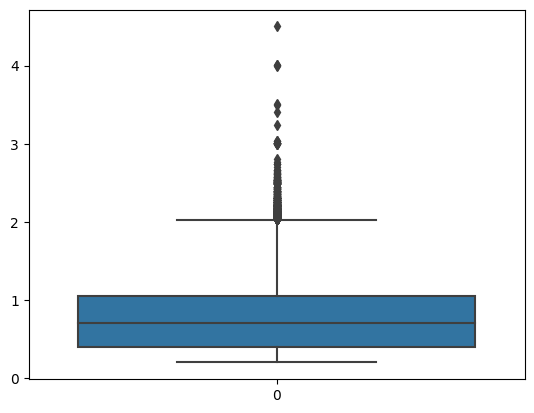

In [52]:
sns.boxplot(df['carat'])
plt.show()

## Cut

In [53]:
df_win.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [54]:
df_win['cut'].unique()   # categorical variable

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

<Axes: xlabel='cut', ylabel='count'>

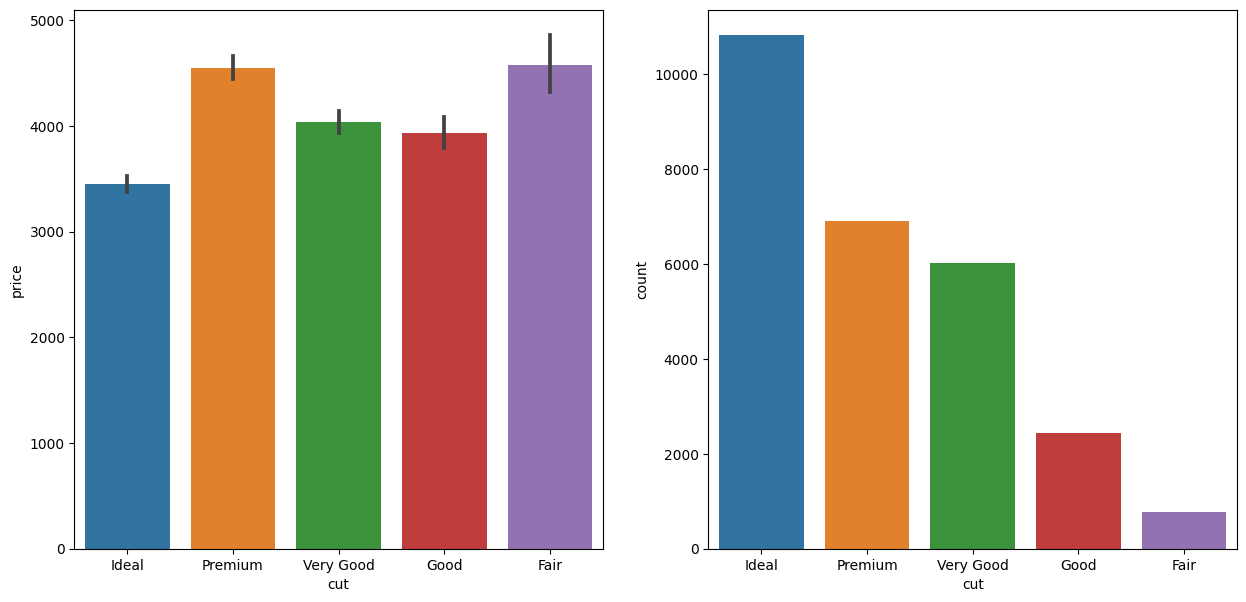

In [55]:

fig,axes = plt.subplots(1,2,figsize =(15,7))
# row, column
sns.barplot(data=df_win,x='cut',y='price',ax=axes[0])
sns.countplot(data =df_win,x='cut',ax=axes[1])

#### Fair has the highest Price but the lowest count , Ideal is vice versa 
#### note Premium is nearby fair in terms of price and the has the 2nd highest count

#### Color

In [56]:
df_win['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

<Axes: xlabel='color', ylabel='count'>

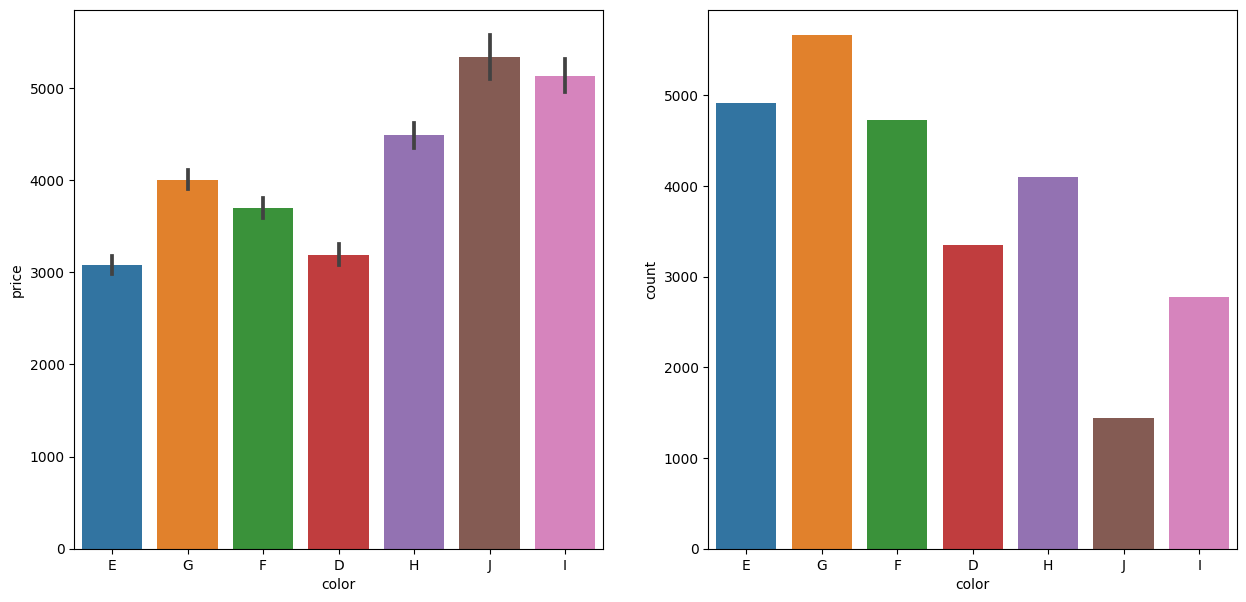

In [57]:
fig,axes = plt.subplots(1,2,figsize =(15,7))
sns.barplot(data = df_win,x='color',y='price',ax=axes[0])
sns.countplot(data =df_win,x='color',ax=axes[1])

#### Inference :
##### J and I rank higher in terms of price but are very less in number
##### color G is ranked 4th in terms of price while having the most count

## Clarity

In [58]:
df_win.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [59]:
df['clarity'].head()

0     SI1
1      IF
2    VVS2
3     VS1
4    VVS1
Name: clarity, dtype: object

<Axes: xlabel='clarity', ylabel='count'>

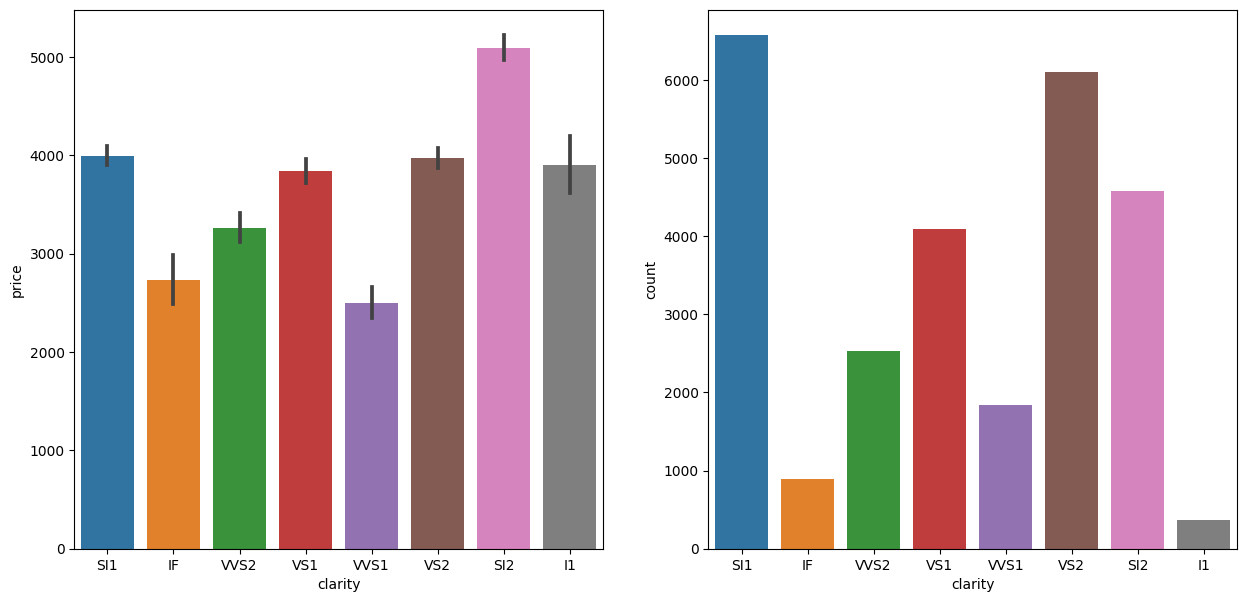

In [60]:
fig,axes = plt.subplots(1,2,figsize =(15,7))
sns.barplot(data = df_win,x='clarity',y='price',ax=axes[0])
sns.countplot(data =df_win,x='clarity',ax=axes[1])

### Inferences from clarity
###### S12 is the highest priced and it terms of demands / counts it ranks 3rd 
##### SI1 is the 2nd highest in terms of prices and has the maximum count

## Depth

In [91]:
#  Creating a function for checking the outliers
def IQR (attribute):
  Q1 = df[attribute].quantile(0.25)
  Q3 = df[attribute].quantile(0.75)
  IQR  = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return ([lower_range,upper_range])

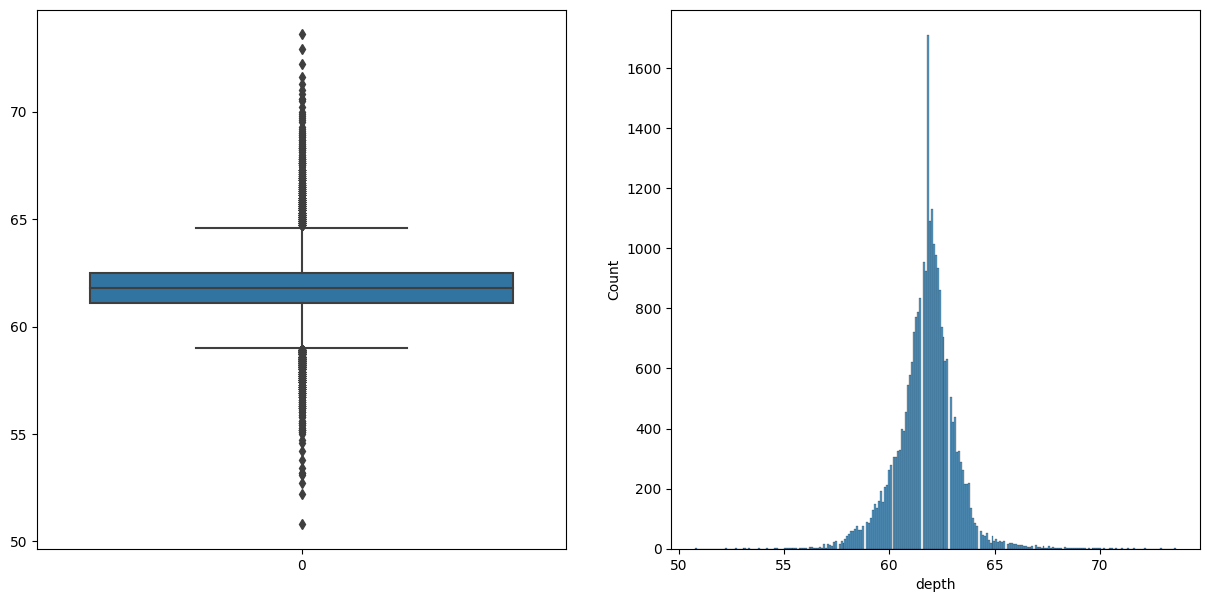

In [114]:
plot_hist_bar('depth')

#### Inference 1 for depth 
data has normal distribution meaning its bell shaped and the has the peak in the center 
Outliers are present equllay on both upper and lower limit limit further analyis required to see the % 

In [92]:
lower_range,upper_range = IQR('depth')
## Destructing 
print(f'lower_range is {lower_range}')
print(f'upper_range is {upper_range }')

lower_range is 59.0
upper_range is 64.6


In [72]:
df.loc[df['depth'] < lower_range,'depth']

50       58.0
73       58.4
170      58.5
196      58.8
234      58.8
         ... 
26784    58.7
26806    56.0
26823    58.9
26842    57.3
26952    58.3
Name: depth, Length: 902, dtype: float64

In [73]:
df.loc[df['depth'] > upper_range,'depth']

14       66.2
58       64.9
100      66.8
101      65.2
128      65.5
         ... 
26509    65.2
26573    70.8
26624    65.4
26628    65.5
26925    66.2
Name: depth, Length: 517, dtype: float64

In [76]:
TOTAL = df['depth'].count()
print(TOTAL)

26967


In [77]:
# Percentage of outliers 
print(902/TOTAL *100) #3.34
print(517/TOTAL * 100)#1.91 total around 5 percent outliers

3.344828864908963
1.9171580079356252


## Table

In [78]:
df['table'].head()

0    58.0
1    58.0
2    60.0
3    56.0
4    59.0
Name: table, dtype: float64

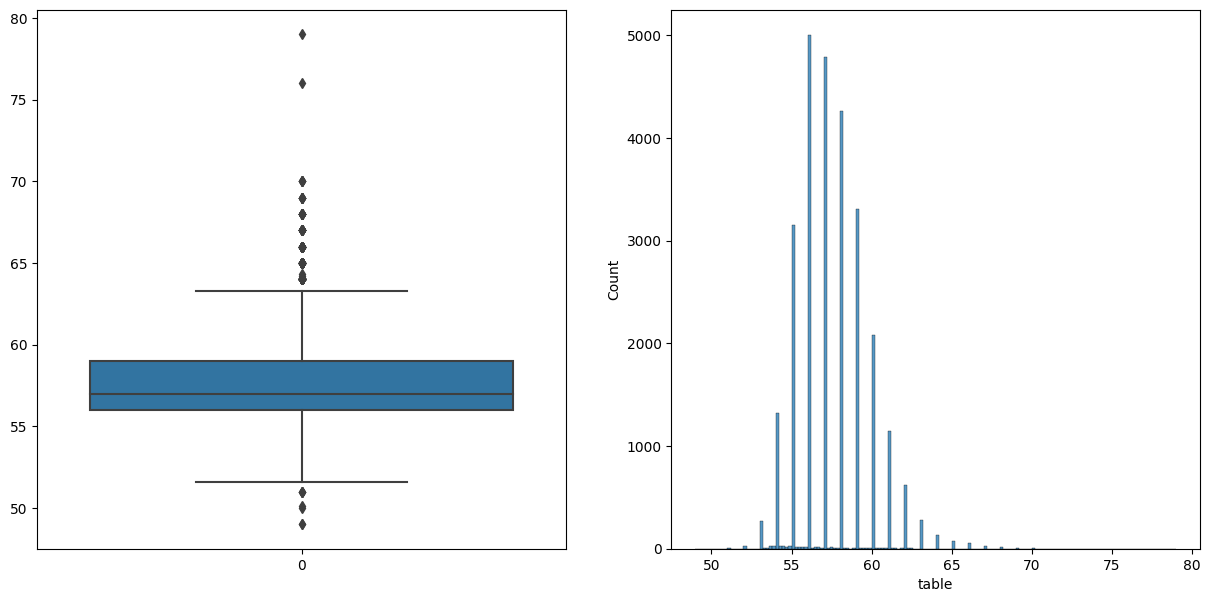

In [115]:
plot_hist_bar('table')

#### Inference one Table
Data seems to be slightly skewed towards the left side although it still retains its bell shaped structute as found in normal distribution

<Axes: >

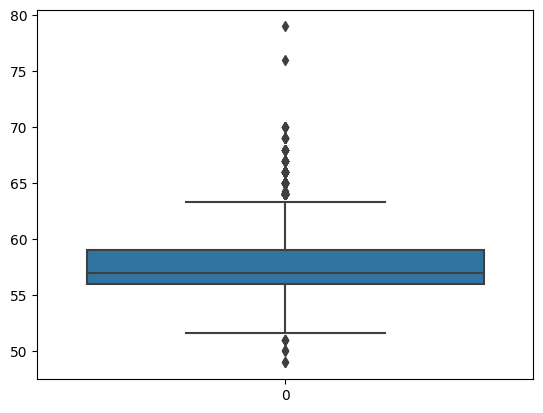

In [116]:
sns.boxplot(df['table'])

In [80]:
df['table'].describe()

count    26967.000000
mean        57.456080
std          2.232068
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64

In [100]:
lower_range,upper_range = IQR('table')
print(f'lower_range is {lower_range}')# lower range is wrong !! Fixed
print(f'upper_range is {upper_range }')

lower_range is 51.5
upper_range is 63.5


In [101]:
df.loc[df['table'] < lower_range,'table'] # 8

788      51.0
6521     49.0
6776     50.0
13248    51.0
14289    51.0
15336    50.1
20180    51.0
20736    49.0
Name: table, dtype: float64

In [86]:
df.loc[df['table'] > upper_range,'table'] # 310

8        64.0
18       64.0
162      64.0
248      64.0
290      65.0
         ... 
26665    64.0
26678    68.0
26731    65.0
26784    67.0
26806    67.0
Name: table, Length: 310, dtype: float64

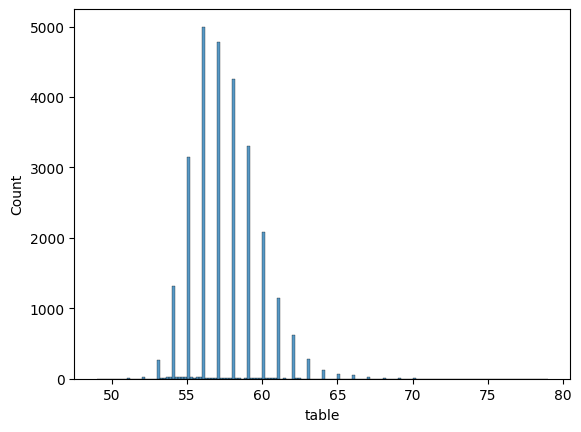

In [87]:
sns.histplot(df['table'])
plt.show()
# As the lower limit is 59 soo a majority of daat falls under that

In [88]:
df['table'].describe()

count    26967.000000
mean        57.456080
std          2.232068
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64

In [103]:
print(8 /TOTAL * 100) # 1 percent are outliers
print(310 / TOTAL * 100) # 

0.029665887937108316
1.1495531575629472


In [96]:
Q1_table = df['table'].quantile(0.25)
Q3_table = df['table'].quantile(0.75)
IQR = Q3_table -Q1_table
Q1_table-1.5*IQR

51.5

In [104]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

### x 

In [106]:
df['x'].head()

0    4.27
1    4.42
2    6.04
3    4.82
4    4.35
Name: x, dtype: float64

In [110]:
def plot_hist_bar(attribute):
  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  sns.boxplot(df[attribute])
  plt.subplot(1,2,2)
  sns.histplot(df[attribute])

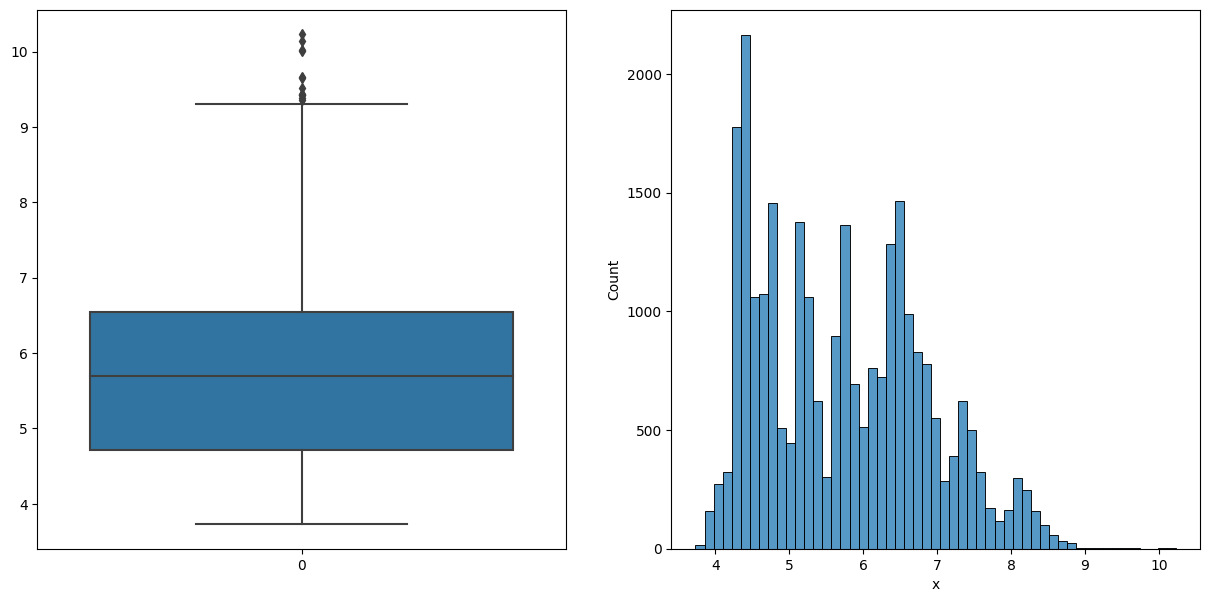

In [111]:
plot_hist_bar('x')

#### Inferences for X dimensions part 1  
Left skewed dataset as count seems to be highest for values ranging between  4 and 5
Only upper bound outliers seem to visible  

In [118]:
lower_range,upper_range = IQR('x')
print(f'lower_range is {lower_range}')
print(f'upper_range is {upper_range }')

lower_range is 1.9500000000000002
upper_range is 9.309999999999999


In [119]:
df.loc[df['x'] < lower_range,'x'] 

Series([], Name: x, dtype: float64)

In [120]:
df.loc[df['x'] > upper_range,'x'] 

3025     10.02
8156     10.01
8573      9.65
12500    10.23
12758     9.42
15080     9.66
15488     9.36
16538     9.38
17076     9.42
19761     9.51
20505    10.14
26869     9.44
Name: x, dtype: float64

#### Percentage of outliers is going to be even less than 1 percent for the upper limit 0.04 %

In [122]:
12/ TOTAL * 100

0.04449883190566248

## y

In [123]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')